### Answer 1
See: https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-derivated

The derivative of the sigmoid function is given by
$$
\begin{align}\frac{d}{dx}\sigma(x)&=\frac{d}{dx}\left(\frac{1}{1+e^{-x}}\right)\\[2ex]
&=\frac{-(1+e^{-x})'}{(1+e^{-x})^2}\\[2ex]
&=\frac{e^{-x}}{(1+e^{-x})^2}\\[2ex]
&=\left(\frac{1}{1+e^{-x}}\right)\left(\frac{e^{-x}}{1+e^{-x}}\right)\\[2ex]
&=\left(\frac{1}{1+e^{-x}}\right)\,\left(\frac{1+e^{-x}}{1+e^{-x}}-\frac{1}{1+e^{-x}}\right)\\[2ex]
&=\sigma(x)\,\left(\frac{1+e^{-x}}{1+e^{-x}}-\sigma(x)\right)\\[2ex]
&=\sigma(x)\,(1-\sigma(x))
\end{align}
$$

And now, 
$$
\begin{align} 
\frac{\partial J(\beta)}{\partial \beta_j}  &= 
\frac{\partial}{\partial \beta_j} \,\frac{-1}{m}\sum_{i=1}^m 
\left[ y^{(i)}\left(\log(h_\beta \left(x^{(i)}\right)\right) +
(1 -y^{(i)})\left(\log(1-h_\beta \left(x^{(i)}\right)\right)\right]\\[2ex]
&\underset{\text{linearity}}= \,\frac{-1}{m}\,\sum_{i=1}^m 
\left[ 
y^{(i)}\frac{\partial}{\partial \beta_j}\log\left(h_\beta \left(x^{(i)}\right)\right) +
(1 -y^{(i)})\frac{\partial}{\partial \beta_j}\left(\log(1-h_\beta \left(x^{(i)}\right)\right)
\right]\\[2ex]
&\underset{\text{chain rule}}= \,\frac{-1}{m}\,\sum_{i=1}^m 
\left[ 
y^{(i)}\frac{\frac{\partial}{\partial \beta_j}(h_\beta \left(x^{(i)}\right)}{h_\beta\left(x^{(i)}\right)} +
(1 -y^{(i)})\frac{\frac{\partial}{\partial \beta_j}\left(1-h_\beta \left(x^{(i)}\right)\right)}{1-h_\beta\left(x^{(i)}\right)}
\right]\\[2ex]
&\underset{h_\beta(x)=\sigma\left(\beta^\top x\right)}=\,\frac{-1}{m}\,\sum_{i=1}^m 
\left[ 
y^{(i)}\frac{\frac{\partial}{\partial \beta_j}\sigma\left(\beta^\top x^{(i)}\right)}{h_\beta\left(x^{(i)}\right)} +
(1 -y^{(i)})\frac{\frac{\partial}{\partial \beta_j}\left(1-\sigma\left(\beta^\top x^{(i)}\right)\right)}{1-h_\beta\left(x^{(i)}\right)}
\right]\\[2ex]
&\underset{\sigma'}=\frac{-1}{m}\,\sum_{i=1}^m 
\left[ y^{(i)}\,
\frac{\sigma\left(\beta^\top x^{(i)}\right)\left(1-\sigma\left(\beta^\top x^{(i)}\right)\right)\frac{\partial}{\partial \beta_j}\left(\beta^\top x^{(i)}\right)}{h_\beta\left(x^{(i)}\right)}\\ -
(1 -y^{(i)})\,\frac{\sigma\left(\beta^\top x^{(i)}\right)\left(1-\sigma\left(\beta^\top x^{(i)}\right)\right)\frac{\partial}{\partial \beta_j}\left(\beta^\top x^{(i)}\right)}{1-h_\beta\left(x^{(i)}\right)}
\right]\\[2ex]
&\underset{\sigma\left(\beta^\top x\right)=h_\beta(x)}= \,\frac{-1}{m}\,\sum_{i=1}^m 
\left[ 
y^{(i)}\frac{h_\beta\left( x^{(i)}\right)\left(1-h_\beta\left( x^{(i)}\right)\right)\frac{\partial}{\partial \beta_j}\left(\beta^\top x^{(i)}\right)}{h_\beta\left(x^{(i)}\right)} \\-
(1 -y^{(i)})\frac{h_\beta\left( x^{(i)}\right)\left(1-h_\beta\left(x^{(i)}\right)\right)\frac{\partial}{\partial \beta_j}\left( \beta^\top x^{(i)}\right)}{1-h_\beta\left(x^{(i)}\right)}
\right]\\[2ex]
&\underset{\frac{\partial}{\partial \beta_j}\left(\beta^\top x^{(i)}\right)=x_j^{(i)}}=\,\frac{-1}{m}\,\sum_{i=1}^m \left[y^{(i)}\left(1-h_\beta\left(x^{(i)}\right)\right)x_j^{(i)}-
\left(1-y^{i}\right)\,h_\beta\left(x^{(i)}\right)x_j^{(i)}
\right]\\[2ex]
&\underset{\text{distribute}}=\,\frac{-1}{m}\,\sum_{i=1}^m \left[y^{i}-y^{i}h_\beta\left(x^{(i)}\right)-
h_\beta\left(x^{(i)}\right)+y^{(i)}h_\beta\left(x^{(i)}\right)
\right]\,x_j^{(i)}\\[2ex]
&\underset{\text{cancel}}=\,\frac{-1}{m}\,\sum_{i=1}^m \left[y^{(i)}-h_\beta\left(x^{(i)}\right)\right]\,x_j^{(i)}\\[2ex]
&=\frac{1}{m}\sum_{i=1}^m\left[h_\beta\left(x^{(i)}\right)-y^{(i)}\right]\,x_j^{(i)}
\end{align}
$$

### Answer 2

In [ ]:
# credit for some of the code: https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac

import numpy as np

class Normalizer():
  def __init__(self):
    self.mean = None
    self.std = None
  def fit(self, X):
    self.mean = X.mean()
    self.std = X.std()
  def predict(self, X):
    if (self.mean is None) or (self.std is None):
      raise ValueError('you should call fit before predict')
    return (X-self.mean)/self.std
  
class LogisticRegression:
  def __init__(self, learning_rate=0.01, num_iterations=100000, 
               method='GD',
               normalize=True, track_loss=False):
    self.learning_rate = learning_rate
    self.num_iterations = num_iterations
    self.beta = None
    self.normalize = normalize
    self.normalizer = Normalizer()
    self.track_loss = track_loss
    self.loss = []
    self.method = method
       
  def _add_intercept(self, X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)
  
  def fit(self, X, y):
    self._fit(self._add_intercept(X), y)
    return self
  
  def predict_prob(self, X):
    if self.beta is None:
      raise ValueError('model was not fitted')
    return self._predict_prob(self._add_intercept(X))
  
  def _predict_prob(self, X):
    if self.normalize:
      X = self.normalizer.predict(X)
    return self._sigmoid(np.dot(X, self.beta))
    
  def predict(self, X, threshold=0.5):
    return self.predict_prob(X) >= threshold
      
  def _sigmoid(self, z):
    return 1 / (1 + np.exp(-z))
      
  def _loss(self, h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
  def score(self, X, y):
    return self._loss(self.predict_prob(X), y)
    
  def _fit(self, X, y):
    Xorig = X
    if self.normalize:
      self.normalizer.fit(X)
      X = self.normalizer.predict(X)
      
    self.loss = []
    self.detailed_loss = []

    self.beta = np.zeros(X.shape[1])  # weights initialization
    for iter in range(self.num_iterations):
      self._step(X, y, Xorig)
      if self.track_loss:
        loss = self.score(Xorig[:,1:], y) # get rid of the padded 1, use Xorig otherwise it will be padded twice
        self.loss.append(loss)

  def _step(self, X, y, Xorig):
    n = X.shape[0]
    if self.method=='GD':
      z = np.dot(X, self.beta)
      h = self._sigmoid(z)
      gradient = np.dot(X.T, (h - y)) / n
      self.beta -= self.learning_rate * gradient
    elif self.method=='SGD':
      samples_idx = np.random.permutation(n)
      for i in samples_idx:
        z = np.dot(X[i,:], self.beta)
        h = self._sigmoid(z)
        gradient = X[i,:].T * (h - y)[i]
        self.beta -= self.learning_rate * gradient
        if self.track_loss:
          loss = self.score(Xorig[:,1:], y) # get rid of the padded 1, use Xorig otherwise it will be padded twice
          self.detailed_loss.append(loss)
    else:
      raise ValueError('method not supported')
      

### Answer 3

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [ ]:
import matplotlib.pyplot as plt
def plot_samples(X, y, gd_model=None, sgd_model=None):
  plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
  plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
  plt.legend()
  
  x1_min, x1_max = X[:,0].min(), X[:,0].max(),
  x2_min, x2_max = X[:,1].min(), X[:,1].max(),
  xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
  grid = np.c_[xx1.ravel(), xx2.ravel()]
  if gd_model is not None:
    probs = gd_model.predict_prob(grid).reshape(xx1.shape)
    cs = plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
    plt.clabel(cs, cs.levels, inline=True, fmt={cs.levels[0]:'GD'}, fontsize=10)
  if sgd_model is not None:
    probs = sgd_model.predict_prob(grid).reshape(xx1.shape)
    cs = plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='green');
    plt.clabel(cs, cs.levels, inline=True, fmt={cs.levels[0]:'SGD'}, fontsize=10)



CPU times: user 99 ms, sys: 1.43 ms, total: 100 ms
Wall time: 107 ms
GD Accuracy 0.9933333333333333
CPU times: user 11.8 s, sys: 18.1 ms, total: 11.9 s
Wall time: 11.9 s
SGD Accuracy 1.0


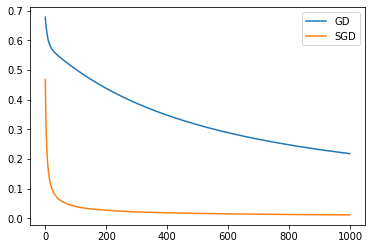

In [4]:
gd_model = LogisticRegression(learning_rate=0.1, num_iterations=1000, method='GD', track_loss=True)
%time gd_model.fit(X, y)
gd_preds = gd_model.predict(X)
print("GD Accuracy", (gd_preds == y).mean())

sgd_model = LogisticRegression(learning_rate=0.1, num_iterations=1000, method='SGD', track_loss=True)
%time sgd_model.fit(X, y)
sgd_preds = sgd_model.predict(X)
print("SGD Accuracy", (sgd_preds == y).mean())

plt.plot(gd_model.loss, label='GD')
plt.plot(sgd_model.loss, label='SGD')
plt.legend();

(0, 1000)

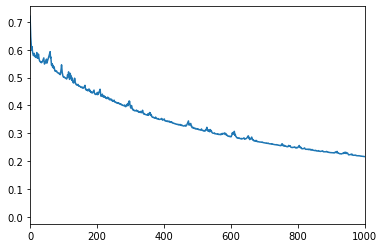

In [5]:
plt.plot(sgd_model.detailed_loss, label='SGD');
plt.xlim([0,1000])

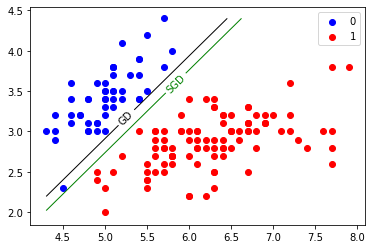

In [6]:
plot_samples(X, y, gd_model, sgd_model)

## Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Multivariate Logistic Regression (a discriminative model). 

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```mnist = sklearn.datasets.fetch_mldata('MNIST original')```

to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.


In [7]:
from sklearn.datasets import fetch_mldata
# Optinally, set data_home to where you want to download your data
mnist = fetch_mldata('MNIST original')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def show_digit_image(digit_data, digit_label=None, title=""):
  plt.imshow(np.reshape(digit_data, (28,28)), cmap=plt.cm.gray)
  plt.title(title, fontsize = 12)
  plt.axis('off')
  plt.grid(False)

def calc_confusion_matrix(true_lables, predicted_labels, normalize=False, show_plot=True, title=""):
  cm = confusion_matrix(true_lables, predicted_labels)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  if show_plot:
    num_labels = np.unique([true_lables, predicted_labels]).size
    plt.figure(figsize=(num_labels, num_labels))
    sns.heatmap(cm, annot=True, fmt=".3f" if normalize else "d", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.title(title, size = 15)
   
  return cm

Image Data Shape(70000, 784)
Label Data Shape(70000,)


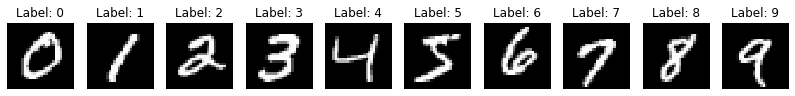

In [9]:
# Print to image data and labels data shapes
print("Image Data Shape" + str(mnist.data.shape))
print("Label Data Shape" + str(mnist.target.shape))

# Print a sample of each digits
plt.figure(figsize=(14,2))
for digit in range(10):
  first_item_index = np.argwhere(mnist.target==digit)[0]
  (image, label) = (mnist.data[first_item_index], mnist.target[first_item_index])
  plt.subplot(1, 10, digit + 1)
  show_digit_image(image, label, title='Label: %i' % digit)


In [ ]:
# Split the data into training and test sets (we set random_state so that we fix
# the splitting, so not every time we run this notebook a different split would be made)
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

### Multivariate Logistic Regression
We will now apply the Multivariate Logistic Regression model discriminative model for this problem. We will use a prepared implementation of the model, so you won't need to implement it.

In this part we will keep the pixel values in grayscale, and assume the probability of each image being classified as one of the 10 digit classes, matches some multivariate logistic function.

#### Question 1
Run a Multivariate Logitic Regression classifier on the training data and apply predictions on the test data. Use the [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation, and set the `solver` to be `'lbfgs'`, and  `multi_class` to `'multinomial'` (leave all other parameters in their default value).

1. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

2. Show some test images which were missclassified (classified incorrectly). Choose one such sample, and output the probability estimates for all classes (use the `predict_proba` function). Describe the results.

Note that here we cannot "generate" examples from the model.

#### Answer 1
Below is the code for fitting, predicting, and evaluating the Multivariate Logistic Regression classifier for this task. 

The total accuracy of our classifier was measured to be 0.913, which is not bad. Looking at the confusion matrix, most of the classes are classified with high accuracy, and we see a little higher confusion classifying 5 as 3, or classifying 4 as 9 and vice versa (note that the confusion is **not symmetric**).

Looking at one instance of a badly classified sample, and plotting the estimated probabilities for each class in this case, we can see that although the maximal probability was assigned to the wrong class, the "second runner" was indeed the correct class, with a relatively high probability compared to the all other classes. This shows that although the model was wrong here, it was not completely off, and we could have used such information to estimate the confidence of the final classification, for example, by measuring what is the maximal probability vs the second highest (a correctly classified sample shows completely different distribution, where the maximal probability is much bigger than any other one).

This is obviously not a complete analysis, as we only looked at one sample and did not quantify the results, but it demonstrates the general behaviour of such classifiers.

In [ ]:
from sklearn.linear_model import LogisticRegression

# All parameters not specified are set to their defaults. The solver was chosen
# to match multinomial loss. In the latest release you can test also the model
# with parameters (penalty = 'l1', solver = 'saga')
logisticRegr = LogisticRegression(solver='lbfgs', multi_class='multinomial')

In [12]:
# Training the model on the data (this may take a while...)
logisticRegr.fit(train_img, train_lbl);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


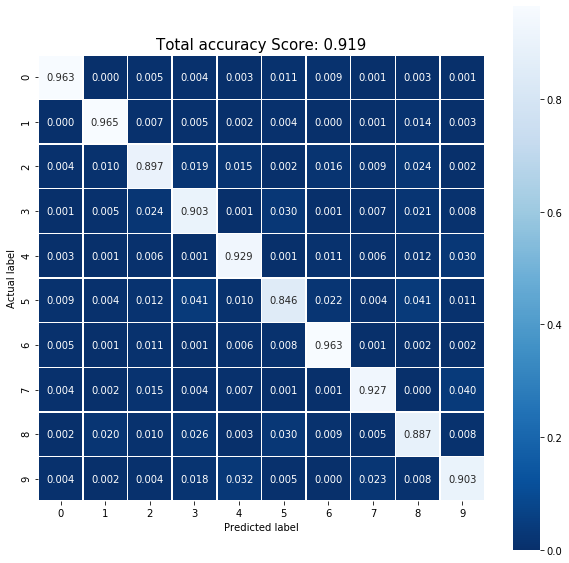

In [13]:
# Predict for One Observation (image)
#logisticRegr.predict(test_img[0].reshape(1,-1))
# Predict for Multiple Observations (images) at Once
#logisticRegr.predict(test_img[0:10])

# Make predictions on all the test data, calcuate the total score (accuracy),
# and plot the confusion matrix
test_pred = logisticRegr.predict(test_img)
score = logisticRegr.score(test_img, test_lbl)
cm = calc_confusion_matrix(test_lbl, test_pred, normalize=True, title = 'Total accuracy Score: {:.3f}'.format(score) )

Now, analysing misclassified images, we plot some such samples and look into the class given data probability distribution of one of the missclassified images.

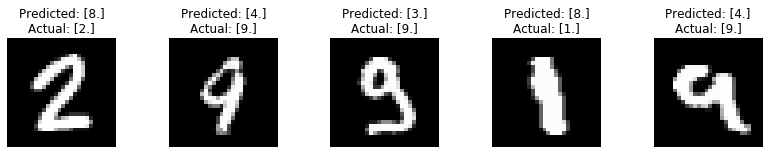

In [14]:
# Misclassified images analysis
misclassifiedIndexes = np.argwhere(test_lbl != test_pred)
    
plt.figure(figsize=(14,2))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    show_digit_image(test_img[badIndex], 
                     title='Predicted: {}\nActual: {}'.format(test_pred[badIndex], test_lbl[badIndex]))

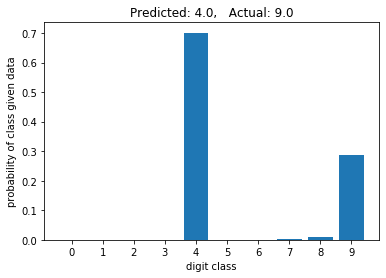

In [15]:
bad_example_index = misclassifiedIndexes[1]
prob = logisticRegr.predict_proba(test_img[bad_example_index])[0]
plt.bar(range(0,10), prob);
plt.xlabel('digit class')
plt.xticks(np.arange(10))
plt.ylabel('probability of class given data')
plt.title('Predicted: {},   Actual: {}'.format(test_pred[bad_example_index][0], test_lbl[bad_example_index][0]));
plt.grid(False)

Repeating the same class given data probability distribution of a correctly classified image yield another picture.

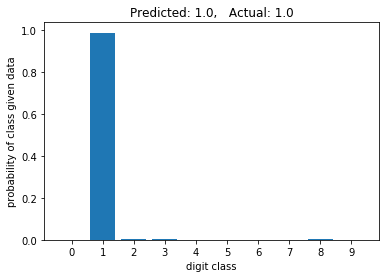

In [16]:
# Same for a correctly classified image sample
correctIndexes = np.argwhere(test_lbl == test_pred)

good_example_index = correctIndexes[0]
prob = logisticRegr.predict_proba(test_img[good_example_index])[0]
plt.bar(range(0,10), prob);
plt.xlabel('digit class')
plt.xticks(np.arange(10))
plt.ylabel('probability of class given data')
plt.title('Predicted: {},   Actual: {}'.format(test_pred[good_example_index][0], test_lbl[good_example_index][0]));
plt.grid(False)

In [17]:
# going over all test set and summarise statistics
correct_prob = logisticRegr.predict_proba(test_img[correctIndexes.ravel()])
mistake_prob = logisticRegr.predict_proba(test_img[misclassifiedIndexes.ravel()])
correct_1st_2nd_diff = np.diff(np.sort(correct_prob)[:,-2:])
mistake_1st_2nd_diff = np.diff(np.sort(mistake_prob)[:,-2:])
print('mean difference between highest and 2nd highest probability class:', 
      np.mean(correct_1st_2nd_diff), 'when correct',
      np.mean(mistake_1st_2nd_diff), 'when wrong')

mean difference between highest and 2nd highest probability class: 0.8953307558033962 when correct 0.46602077909049716 when wrong


#### Question 2
Comparing two methods for solving multiclass classification problems: one-vs-rest (OvR), and multinomial.

1. Discuss the results, and explain the plots in [Plot multinomial and One-vs-Rest Logistic Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html).

2. Create another Logistic Regression classifier, setting now `multi_class` to `'ovr'` (instead of `multinomial`). Leave all other parameters the same. Compare the accuracy of this model with the previous one model. 



#### Answer 2
In the given link, it is easy to see how optimizing a separating hyperplane for each of the parameters separately ends up giving a bad overall classifier, as one class lies between the two other classes.

Below is the code for this task. As can be seen, the total accuracy was reduced (though not by much), from 0.919 to 0.913. In order to make sure this change is significant we need to run multiple tests, and we can use cross validation to calculate the mean test error and variance. Also, we can see that for some of the classes the accuracy actually increased. Generally, running a series of binary regression models as in one-vs-rest will usually get similar results (as can be seen in below), but it means that the regression parameters are estimated separately (and not simultaneously), which means the parameter estimates can end up with more overall unexplained error.

Using OVR instead of multinomial does not have a clear advantage in detecting outliers in our test data.

When testing on odds digits, as can be seen from the plots below, many more examples got low probabilities for all target classes. Actually, 2169 samples had a maximal probability of less than 0.2 over possible classes in the OVR case, where in the multiclass classifier this is not possible by definition (as the probabilities need to sum to 1). For comparison, on the training data, 419 samples matched this criterion. So even a naive approach of taking maximal probabiltiy of 0.2 as a threshold for outliers detection, can already clear some of the data. 

However, when we took images that are completely irrelevant to the test, white noise, we got that this criterion of looking at the maximal probability is not a good measure - actually, the probabilities where more evenly spread in the multinomial classifier predictions.

In [ ]:
from sklearn.linear_model import LogisticRegression

# All parameters not specified are set to their defaults. The solver was chosen
# to match multinomial loss. In the latest release you can test also the model
# with parameters (penalty = 'l1', solver = 'saga')
logisticRegr = LogisticRegression(solver = 'lbfgs', multi_class='ovr')

In [ ]:
# Training the model on the data (this may take a while...)
logisticRegr.fit(train_img, train_lbl);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

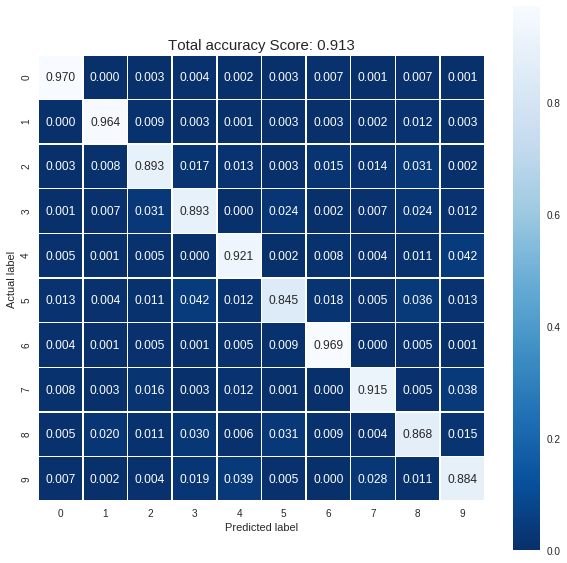

In [ ]:
# Predict for One Observation (image)
#logisticRegr.predict(test_img[0].reshape(1,-1))
# Predict for Multiple Observations (images) at Once
#logisticRegr.predict(test_img[0:10])

# Make predictions on all the test data, calcuate the total score (accuracy),
# and plot the confusion matrix
test_pred = logisticRegr.predict(test_img)
score = logisticRegr.score(test_img, test_lbl)
cm = calc_confusion_matrix(test_lbl, test_pred, normalize=True, title = 'Total accuracy Score: {:.3f}'.format(score) )

### A note on better models
As can be seen, choosing a model that better describes the data may result in a better classification. 

For example, fitting the pixels value distribution to a Multivariate Gaussian generative model, and dropping the independence assumption of the Naive Bayes classifier, will result in a much lower error rate. You can try doing that using [sklearn.mixture.GaussianMixture](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html), setting the number of components to 1.

Another example is train a Neural Network discriminative model on the data, in order to classify the different digits. The current [corresponding Kaggle challenge](https://www.kaggle.com/c/digit-recognizer) leaderboard has such models with (non final) accuracy score of over 0.999, and even 1.
For code examples and more details, you may refer to (for example):
- [A high-level tutorial into Deep Learning using MNIST data and TensorFlow library](https://www.kaggle.com/kakauandme/tensorflow-deep-nn), or
- [Classifying MNIST digits using Convolutional Neural Networks](https://github.com/tgjeon/kaggle-MNIST)

### References
- http://www-inst.eecs.berkeley.edu/~cs70/sp15/notes/n21_slides.pdf
- https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/Logistic_Regression/LogisticRegression_MNIST-Easier_Loading.ipynb
- http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html (not used above)